In [1]:
import Pkg

packages = [ "Plots", "ProgressBars", "Optim", "LinearAlgebra", "Statistics", "Compat"]
Pkg.add(packages)

Pkg.add(path="/opt/julia/local/packages/MobergIO")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


   Updating git-repo `/opt/julia/local/packages/MobergIO`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
push!(LOAD_PATH, pwd())
    
using FurutaProcess

In [3]:
phi, dphidt, theta, dthetadt = get_x()

(3.901245595841374, 4.76837158203125e-7, 6.25402880006186, 4.76837158203125e-7)

In [4]:
function my_test_run()
    xs = []
    ts = []
    total_time = 3.0
    elapsed_time = 0.0
    sleep_time = 0.01
    torque(t) = sin(50*t)/5
    
    enable!()
    start_time = time()
    
    while elapsed_time < total_time
        push!(ts, elapsed_time)
        push!(xs, get_x())
        set_torque!(torque(elapsed_time))
        sleep(sleep_time)
        elapsed_time = time() - start_time
    end
    
    set_torque!(0.0)
    disable!()
    
    ts, xs;
end    

my_test_run (generic function with 1 method)

In [13]:
ts, xs = my_test_run();

In [6]:
using Plots

In [14]:
phis = [ x[1] for x in xs ];
phidots = [x[2] for x in xs];
thetas = [ x[3] for x in xs ];
thetadots = [x[4] for x in xs];

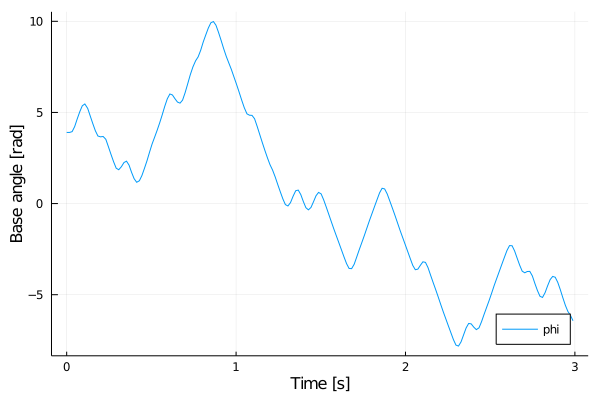

In [8]:
plot(ts, phis, xlabel = "Time [s]", ylabel = "Base angle [rad]", label = "phi", legend=:bottomright)

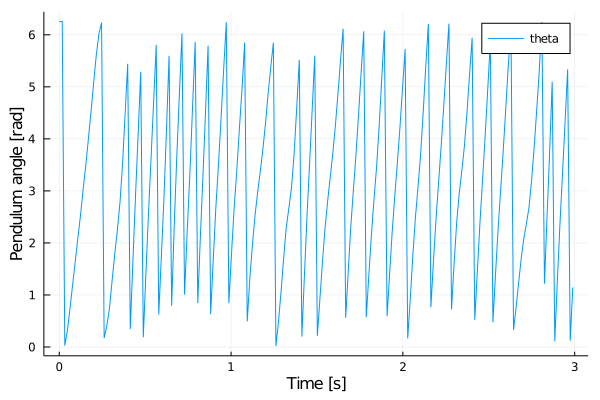

In [9]:
plot(ts, thetas, xlabel = "Time [s]", ylabel = "Pendulum angle [rad]", label = "theta")

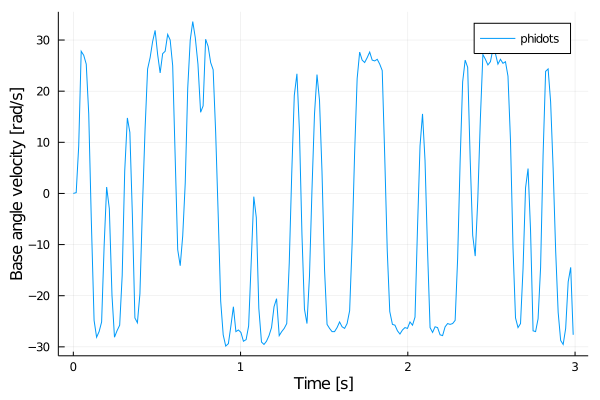

In [10]:
plot(ts, phidots, xlabel = "Time [s]", ylabel = "Base angle velocity [rad/s]", label = "phidots")

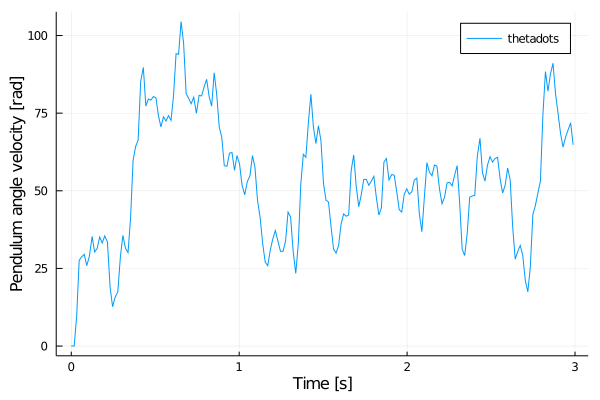

In [11]:
plot(ts, thetadots, xlabel = "Time [s]", ylabel = "Pendulum angle velocity [rad]", label = "thetadots")

In [3]:
reset!()

true

In [58]:
function apply_torque(ω)
    total_time = 0.04;
    elapsed_time = 0.0;
    sleep_time = 0.01;
    torque = 0.2;
    
    enable!()
    start_time = time();
    
    while elapsed_time < total_time 
        set_torque!(torque*ω);
        sleep(sleep_time);
        elapsed_time = time() - start_time;
    
    end
    set_torque!(0.0);
    disable!();
    
end
    

apply_torque (generic function with 1 method)

In [69]:
apply_torque(0.6); #Start pendulum


In [ ]:
function LQR_controller(xs[]) 
    xs[3] += deg2rad(180);
    
    k = [-100, -179, -320, -110]; # Feedback input from LQR-controller (Calcualted from matlab script)
    torque = k * transpose(xs);
    
end

In [93]:
function main()
    xs = [];
    ts = [];
    total_time = 10.0;   #Initialize time parameters
    elapsed_time = 0;
    sleep_time = 0.01;
    ϕ = 0;               #Initialize angle parameters
    θ = 0;
    ϕ̇ = 0;
    θ̇ = 0;
    ω = 0.60;            #Initialize weight parameter for swing up function
    
    enable!()             #Enable Furuta Pendulum
    start_time = time();   
    
    apply_torque(ω);   # Swing up 
    
    while true 
        print("test");
        push!(ts, elapsed_time)
        push!(xs, get_x())
        θ = get_theta();
        
        
        if (deg2rad(330) < θ | θ < deg2rad(30))
            print("")
            apply_torqe(ω)
        end
    break  
    sleep(sleep_time)
    elapsed_time = time() - start_time
        
    end
    
    set_torque!(0.0)
    disable!()
    
    ts, xs;
end    
    

main (generic function with 1 method)

In [94]:
main();

test

LoadError: BoundsError: attempt to access 1-element Array{Any,1} at index [3]

In [15]:
θ = thetas[1]
Φ = phis[1]
θ0 = rad2deg(θ)
Φ0 = rad2deg(Φ)

@show θ0
@show Φ0

θ0 = 0.15389782245689262
Φ0 = -753.4093989381545


-753.4093989381545